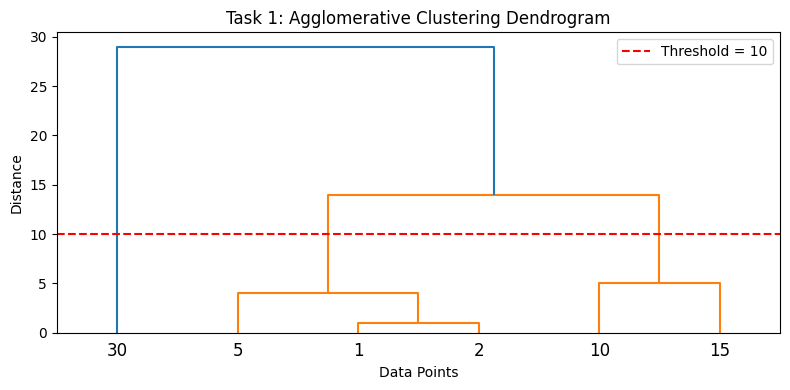


Task 2: Simulated Divisive Clustering Final Clusters:
Cluster 1: [[1, 2]]
Cluster 2: [[3, 4]]
Cluster 3: [[5, 5]]
Cluster 4: [[8, 9]]
Cluster 5: [[12, 15]]


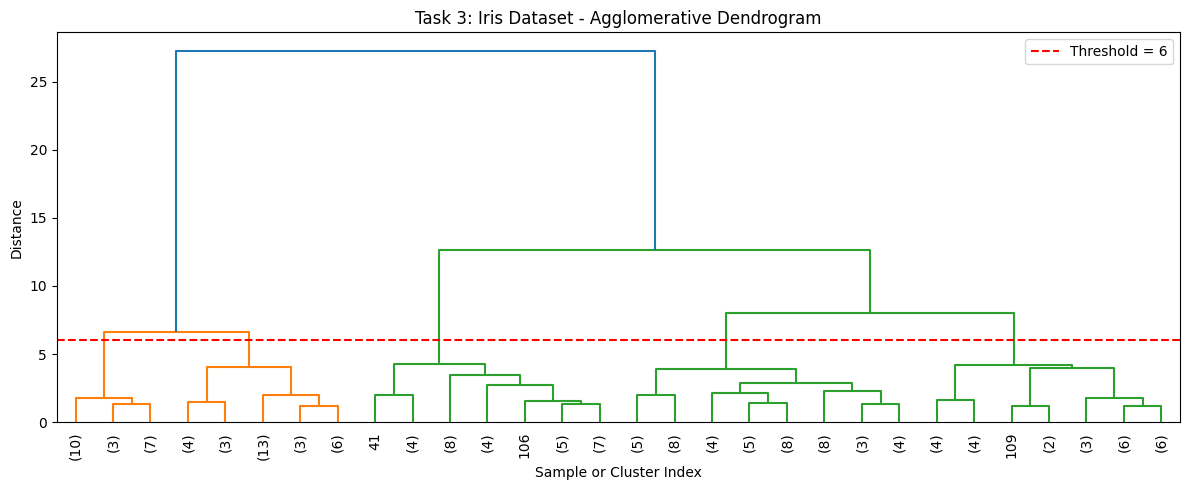

In [1]:

# Dendrograms for Cluster Visualization

# Task 1: Visualizing Agglomerative Clustering

# 1. Use the same numerical dataset: [1, 2, 5, 10, 15, 30] .
# 2. Generate a dendrogram using the linkage method of your choice (e.g., single, complete, average).
# 3. Identify the optimal number of clusters by selecting a threshold.

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


data_1d = np.array([1, 2, 5, 10, 15, 30]).reshape(-1, 1)
Z_1d = linkage(data_1d, method='complete')

plt.figure(figsize=(8, 4))
dendrogram(Z_1d, labels=[1, 2, 5, 10, 15, 30])
plt.axhline(y=10, color='red', linestyle='--', label='Threshold = 10')
plt.title("Task 1: Agglomerative Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.legend()
plt.tight_layout()
plt.show()


# Task 2: Visualizing Divisive Clustering

# 1. Employ a simple dataset: [(1, 2), (3, 4), (5, 5), (8, 9), (12, 15)] .
# 2. Construct a dendrogram based on divisive clustering.
# 3. Discuss how the dendrogram and cluster divisions align.

data_2d = np.array([(1, 2), (3, 4), (5, 5), (8, 9), (12, 15)])

def recursive_divisive_clustering(data, depth=0, max_depth=None):
    if len(data) <= 1 or (max_depth is not None and depth >= max_depth):
        return [data]
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans.fit(data)
    labels = kmeans.labels_
    clusters = [data[labels == i] for i in range(2)]
    result = []
    for cluster in clusters:
        result.extend(recursive_divisive_clustering(cluster, depth+1, max_depth))
    return result

clusters = recursive_divisive_clustering(data_2d)
print("\nTask 2: Simulated Divisive Clustering Final Clusters:")
for i, c in enumerate(clusters, 1):
    print(f"Cluster {i}: {c.tolist()}")



# Task 3: Dendrogram Interpretation on a Real Dataset

# 1. Load the Iris dataset.
# 2. Perform Agglomerative Clustering and create a dendrogram.
# 3. Discuss how the dendrogram can help in understanding the natural grouping of data points in the dataset.

iris = load_iris()
X = iris.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Z_iris = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 5))
dendrogram(Z_iris, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=10)
plt.axhline(y=6, color='red', linestyle='--', label='Threshold = 6')
plt.title("Task 3: Iris Dataset - Agglomerative Dendrogram")
plt.xlabel("Sample or Cluster Index")
plt.ylabel("Distance")
plt.legend()
plt.tight_layout()
plt.show()


